In [1]:
pwd

'C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\code'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,Sequential
from sklearn.metrics import confusion_matrix

In [3]:
%matplotlib inline

In [4]:
# df_clean = pd.read_csv('C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\dataset\\patient_chart_cleansing.csv')

In [5]:
# df_clean.head()

In [6]:
# df_original = pd.read_csv('C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\dataset\\all_patient_charts.csv')

In [7]:
# df_original.head()

In [8]:
df = pd.read_csv('C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\dataset\\new_dataset.csv')

In [9]:
df.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00


In [10]:
cols = ['spo2', 'bpm', 'rr', 'sbp', 'dbp', 'mbp']
df['merge_values'] = df[cols].apply(lambda x: '/'.join(x.values.astype(str)), axis=1)

In [11]:
df.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time,merge_values
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00,97.0/63.5/18.0/112.0/78.0/87.0
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00,96.0/64.0/16.0/106.0/71.0/81.0
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00,95.0/61.0/15.0/105.0/65.0/78.0
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00,96.0/63.0/23.0/102.0/65.0/76.0
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00,97.0/57.0/18.0/105.0/75.0/84.0


In [12]:
df.value_counts()

patient_id  spo2   bpm   rr    sbp    dbp    mbp   start_time           end_time             merge_values                   
10000032    93.5   94.0  20.0  122.5  70.0   62.0  2180-07-23 21:41:00  2180-07-23 22:11:00  93.5/94.0/20.0/122.5/70.0/62.0     1
16534814    99.0   76.0  21.0  103.0  36.0   54.0  2144-05-19 20:48:00  2144-05-19 21:18:00  99.0/76.0/21.0/103.0/36.0/54.0     1
                   75.0  22.0  69.0   25.0   36.0  2144-05-21 09:48:00  2144-05-21 10:18:00  99.0/75.0/22.0/69.0/25.0/36.0      1
                         23.0  113.0  43.0   73.5  2144-04-15 09:48:00  2144-04-15 10:18:00  99.0/75.0/23.0/113.0/43.0/73.5     1
                         29.0  99.0   34.5   75.0  2144-04-14 06:48:00  2144-04-14 07:18:00  99.0/75.0/29.0/99.0/34.5/75.0      1
                                                                                                                               ..
13282748    97.0   75.0  14.0  107.0  55.0   69.0  2199-02-27 22:41:00  2199-02-27 23:11:00  97

In [13]:
all_values = df['merge_values'].str.split(pat="/")
all_values

0          [97.0, 63.5, 18.0, 112.0, 78.0, 87.0]
1          [96.0, 64.0, 16.0, 106.0, 71.0, 81.0]
2          [95.0, 61.0, 15.0, 105.0, 65.0, 78.0]
3          [96.0, 63.0, 23.0, 102.0, 65.0, 76.0]
4          [97.0, 57.0, 18.0, 105.0, 75.0, 84.0]
                           ...                  
2292024    [98.0, 67.0, 19.0, 108.5, 57.5, 73.5]
2292025    [99.0, 65.0, 18.0, 103.0, 63.0, 75.0]
2292026    [98.0, 66.0, 23.0, 107.0, 65.0, 78.0]
2292027     [96.0, 67.0, 11.0, 95.0, 56.5, 69.0]
2292028    [97.0, 67.0, 18.0, 107.0, 56.0, 71.0]
Name: merge_values, Length: 2292029, dtype: object

In [14]:
def diseases(symptoms):
    
    spo2 = float(symptoms[0])
    bpm = float(symptoms[1])
    rr = float(symptoms[2])
    mbp = float(symptoms[5])
    
    RED = (spo2<=80) and ((rr>35) | (rr<=8)) and (bpm>=130) and (mbp<=80)
    
    ORANGE = (((spo2)>=80) and (spo2<=90)) and (((rr)>=31) and ((rr)<=35)) and (((bpm>=121) and (bpm<=130)) | (bpm<=40)) and\
    ((mbp>=80) and (mbp<=90))
    
    YELLOW = ((spo2>=90) and (spo2<=94)) and ((rr>=26) and (rr<=30)) and (((bpm>=111) and (bpm<=120)) | ((bpm>=40) and (bpm<=49))) 
    
    GREEN = (spo2>=95) and ((rr>8) and (rr<25)) and ((bpm>50) and (bpm<110)) 
    
    if RED:
        red = 1
        return red
    if ORANGE:
        orange = 2
        return orange
    if YELLOW:
        yellow = 3
        return yellow
    if GREEN:
        green = 4
        return green
    else:
        normal = 0
        return normal

In [15]:
df['labels'] = all_values.apply(diseases)

In [16]:
# df.drop(['merge_values'], axis=1, inplace=True)

In [17]:
df.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time,merge_values,labels
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00,97.0/63.5/18.0/112.0/78.0/87.0,4
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00,96.0/64.0/16.0/106.0/71.0/81.0,4
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00,95.0/61.0/15.0/105.0/65.0/78.0,4
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00,96.0/63.0/23.0/102.0/65.0/76.0,4
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00,97.0/57.0/18.0/105.0/75.0/84.0,4


In [18]:
labeled_data = df.copy()

In [19]:
labeled_data.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time,merge_values,labels
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00,97.0/63.5/18.0/112.0/78.0/87.0,4
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00,96.0/64.0/16.0/106.0/71.0/81.0,4
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00,95.0/61.0/15.0/105.0/65.0/78.0,4
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00,96.0/63.0/23.0/102.0/65.0/76.0,4
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00,97.0/57.0/18.0/105.0/75.0/84.0,4


In [20]:
labeled_data = labeled_data.drop( ['patient_id','start_time', 'end_time', 'merge_values' ], axis=1)

In [21]:
labeled_data.head()

,spo2,bpm,rr,sbp,dbp,mbp,labels
0,97.0,63.5,18.0,112.0,78.0,87.0,4
1,96.0,64.0,16.0,106.0,71.0,81.0,4
2,95.0,61.0,15.0,105.0,65.0,78.0,4
3,96.0,63.0,23.0,102.0,65.0,76.0,4
4,97.0,57.0,18.0,105.0,75.0,84.0,4


In [22]:
labeled_data= labeled_data[labeled_data.labels!= 0]

In [23]:
labels = labeled_data.iloc[:,6]
num_labels = Counter(labels)
num_labels

Counter({4: 1227149, 3: 5986, 1: 79, 2: 46})

In [24]:
labeled_data['labels'].value_counts()

4    1227149
3       5986
1         79
2         46
Name: labels, dtype: int64

In [25]:
X = labeled_data.iloc[:, 1:-1].values[:100000]

In [26]:
y = labeled_data.iloc[:, -1].values[:100000]

In [27]:
y

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [28]:
print(type(X))

<class 'numpy.ndarray'>


In [29]:
print(type(y))

<class 'numpy.ndarray'>


In [30]:
X.shape

(100000, 5)

In [31]:
print(X)

[[ 63.5  18.  112.   78.   87. ]
 [ 64.   16.  106.   71.   81. ]
 [ 61.   15.  105.   65.   78. ]
 ...
 [ 65.   16.  121.   65.   87. ]
 [ 74.   22.  110.5 116.5  93. ]
 [ 63.   16.  131.   76.   98. ]]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# plt.figure(figsize=(8,6))

# plt.subplot(1,3,1)
# plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

# plt.subplot(1,3,2)
# plt.scatter(X_train[:,2], X_train[:,3], c=y_train)

# plt.subplot(1,3,3)
# plt.scatter(X_train[:,4], X_train[:,0], c=y_train)

# plt.show()

In [61]:
# y_test = tf.one_hot(y_test, depth=4)
# y_train = tf.one_hot(y_train, depth=4)

y_test = tf.one_hot(tf.cast(tf.reshape(y_test, -1), dtype=tf.int32), depth=4)
y_train = tf.one_hot(tf.cast(tf.reshape(y_train, -1), dtype=tf.int32), depth=4)


In [62]:
print(y_train[:5])

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(5, 4), dtype=float32)


In [63]:
print(X_train.shape)
print(y_train.shape)
print(y_train[:5])

(70000, 5)
(70000, 4)
tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(5, 4), dtype=float32)


In [64]:
print(X_train.shape)
print(y_train.shape)
print(y_train[:5])

(70000, 5)
(70000, 4)
tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(5, 4), dtype=float32)


In [65]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [66]:
model = Sequential()

model.add(layers.Dense(128, input_shape=[5]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               768       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 4)                 68        
                                                                 
Total params: 11,700
Trainable params: 11,700
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
2188/2188 [==============================] - 5s 2ms/step - loss: 19947.8086 - accuracy: 0.2111 - val_loss: 320537.9375 - val_accuracy: 0.9939
Epoch 2/25
2188/2188 [==============================] - 4s 2ms/step - loss: 421869.6250 - accuracy: 0.2418 - val_loss: 1709104.6250 - val_accuracy: 1.3333e-04
Epoch 3/25
2188/2188 [==============================] - 4s 2ms/step - loss: 1469444.5000 - accuracy: 0.2386 - val_loss: 2591975.0000 - val_accuracy: 1.3333e-04
Epoch 4/25
2188/2188 [==============================] - 4s 2ms/step - loss: 3783659.2500 - accuracy: 0.2396 - val_loss: 6327212.5000 - val_accuracy: 0.9939
Epoch 5/25
2188/2188 [==============================] - 4s 2ms/step - loss: 9745945.0000 - accuracy: 0.2488 - val_loss: 43412304.0000 - val_accuracy: 1.3333e-04
Epoch 6/25
2188/2188 [==============================] - 4s 2ms/step - loss: 17323254.0000 - accuracy: 0.2568 - val_loss: 18662696.0000 - val_accuracy: 1.3333e-04
Epoch 7/25
2188/2188 [===========================

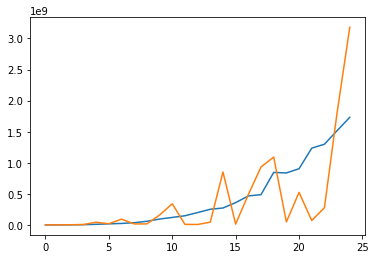

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [70]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(25)

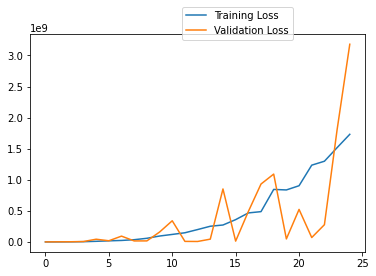

In [71]:
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=1)

In [72]:
model.evaluate(X_test,y_test)

938/938 [==============================] - 1s 1ms/step - loss: 3180351744.0000 - accuracy: 0.9939


[3180351744.0, 0.9938666820526123]

In [73]:
y_hat = model.predict(X_test)

In [74]:
print(y_hat[0])
print(y_test[0])

[1. 0. 0. 0.]
tf.Tensor([0. 0. 0. 0.], shape=(4,), dtype=float32)


In [75]:
labels = np.argmax(y_test, axis=1)
prediction = np.argmax(y_hat, axis=1)

In [76]:
print(y_hat.shape)
print(prediction.shape)

(30000, 4)
(30000,)


In [77]:
print(labels[:5])
print(prediction[:5])

[0 0 0 0 0]
[0 0 0 0 0]


In [78]:
confusion_matrix = tf.math.confusion_matrix(labels, prediction)

In [79]:
confusion_matrix

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[29816,     0,     0,     0],
       [    4,     0,     0,     0],
       [    1,     0,     0,     0],
       [  179,     0,     0,     0]])>

In [80]:
accuracy = (conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[0,0]+conf_matrix[0,1]+conf_matrix[0,2]+conf_matrix[1,0]+conf_matrix[1,1]+conf_matrix[1,2]+conf_matrix[2,0]+conf_matrix[2,1]+conf_matrix[2,2])


In [81]:
print(accuracy)

0.9998323329197545


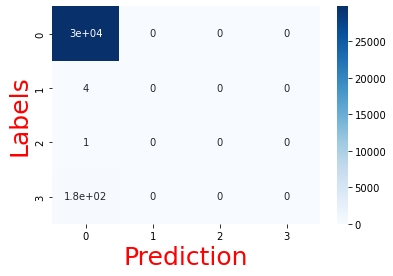

In [82]:
# plt.figure(figsize=(13,10))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Prediction', color='r', fontsize=25)
plt.ylabel('Labels', color='r', fontsize=25)
plt.show()